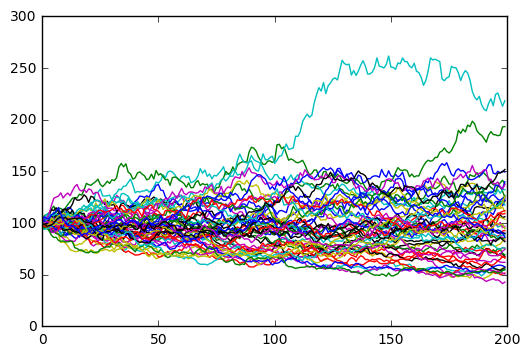

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#株価の確率微分方程式に従うサンプルパスを生成
#dS/S = r * dt + vol * dW_t
def generate_path(S0, T, r, vol, N, M):
    dt = T/M
    w = np.cumsum(np.reshape(np.random.standard_normal(N*M), (N,M)), 1) * (dt**0.5)
    t = np.cumsum(np.ones((N,M)), 1)*dt   
    return S0 * np.exp((r-0.5*vol**2)*t + vol*w)

if __name__ == "__main__":
    #株価・満期・瞬間金利・ボラティリティ
    S0  = 100.0
    T   = 3.0
    R   = 0.01
    VOL = 0.2
    #パス数・時間刻み数
    N = 50
    M = 200
    #パスの生成＆描画
    x = generate_path(S0, T, R, VOL, N, M)
    plt.plot(x.T)
    plt.show()

In [2]:
import math

def binomial_tree(u, d, S0, n):
    result = []
    for element in range(1, n + 2):
        temparray = []
        for number in range(element - 1, -1, -1):
            u_power = number
            d_power = element - 1 - number
            temparray.append(u ** u_power * d ** d_power * S0)
        result.append(temparray)
    return result

def ncr(n, r):
    return math.factorial(n)/math.factorial(r)/math.factorial(n-r)

#def price_tree(btree, n, strike):
#    result = []


voltly = 0.3
T = 0.25
n = 15
u = math.exp(voltly*math.sqrt(T/n))
d = 1.0/u
S0 = 100
r = 0.02
c = 0.01
Rn = math.exp(r*T/n)
strike = 110

p = (math.exp((r-c)*T/n) - d) / (u - d)

q = 1 - p

binomial_arr = binomial_tree(u, d, S0, n)

l = [max(binomial_arr[n][i] - strike, 0) for i in range(0, n+1)]

coeff = [ncr(n, number) for number in range(0, n+1)]

price = 0
for number in range(0, n+1):
    price = price + coeff[number]*l[number]*p**(n-number)*q**(number)

price = price/(Rn**n)


print("price of call option", price)



price of call option 2.6040771329665597
